In [11]:
import smooth_component_analysis as sca
from importlib import reload
reload(sca)
import numpy as np
import pandas as pd
import get_db_data as gdd

from scipy.stats import zscore
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.decomposition import FastICA, PCA

In [12]:
sago = sca.savitzky_golay([1001, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013,
                          1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051],
                          21,11,2,3)

In [5]:
df = sago.get_aligned_signal_componets()

x range: 4.0 222.0


In [13]:
corrs = list(sago.yield_crossgroup_corr(True,'Sg_',True))

corrs[:5]

x range: 4.0 222.0
(1001, 'Sg_101') (1001, 'Sg_102')
(1001, 'Sg_101') (1001, 'Sg_103')
(1001, 'Sg_102') (1001, 'Sg_103')
(1004, 'Sg_110') (1004, 'Sg_111')
(1004, 'Sg_110') (1004, 'Sg_112')
(1004, 'Sg_111') (1004, 'Sg_112')
(1006, 'Sg_116') (1006, 'Sg_117')
(1006, 'Sg_116') (1006, 'Sg_118')
(1006, 'Sg_117') (1006, 'Sg_118')
(1007, 'Sg_119') (1007, 'Sg_120')
(1007, 'Sg_119') (1007, 'Sg_121')
(1007, 'Sg_120') (1007, 'Sg_121')
(1008, 'Sg_122') (1008, 'Sg_123')
(1008, 'Sg_122') (1008, 'Sg_124')
(1008, 'Sg_123') (1008, 'Sg_124')
(1009, 'Sg_125') (1009, 'Sg_126')
(1009, 'Sg_125') (1009, 'Sg_127')
(1009, 'Sg_126') (1009, 'Sg_127')
(1010, 'Sg_128') (1010, 'Sg_129')
(1010, 'Sg_128') (1010, 'Sg_130')
(1010, 'Sg_129') (1010, 'Sg_130')
(1011, 'Sg_131') (1011, 'Sg_132')
(1011, 'Sg_131') (1011, 'Sg_133')
(1011, 'Sg_132') (1011, 'Sg_133')
(1012, 'Sg_134') (1012, 'Sg_135')
(1012, 'Sg_134') (1012, 'Sg_136')
(1012, 'Sg_135') (1012, 'Sg_136')
(1013, 'Sg_137') (1013, 'Sg_138')
(1013, 'Sg_137') (1013, 'Sg_1

[(((1001, 'Sg_101'), (1001, 'Sg_102')), -0.3221172917590262),
 (((1001, 'Sg_101'), (1001, 'Sg_103')), 0.435369198101477),
 (((1001, 'Sg_102'), (1001, 'Sg_103')), -0.03154686382966967),
 (((1004, 'Sg_110'), (1004, 'Sg_111')), 0.17948198900697235),
 (((1004, 'Sg_110'), (1004, 'Sg_112')), 0.204201914511971)]

In [22]:
group_corrs = {}
for o, item in enumerate(corrs):
    group_corrs[item[0][0][0]] = group_corrs.get(item[0][0][0],[])+ [item[1]]
#    if o == 29: 
#        break
group_corrs

{1001: [-0.3221172917590262, 0.435369198101477, -0.03154686382966967],
 1004: [0.17948198900697235, 0.204201914511971, 0.3769278863013425],
 1006: [-0.041804923188305455, 0.5737352455565293, 0.3943595414602932],
 1007: [0.5718471653464967, 0.4766143982811945, 0.78700993661428],
 1008: [0.4613692824571757, 0.27447013674934545, 0.37983317236229547],
 1009: [0.040970668854306946, -0.12059499678511541, 0.10791163630749007],
 1010: [0.4265640223527466, 0.18769709184329952, 0.5595337904063685],
 1011: [0.5211308299685861, 0.2728207192482553, 0.04204736921011438],
 1012: [-0.05039922244734468, -0.06391627989619508, -0.1766878126153445],
 1013: [0.3435635329270653, 0.21428234760802722, 0.25329970971319127],
 1042: [-0.6936865442925318, -0.49181105530045804, 0.5231238213979716],
 1043: [0.023466618682222475, 0.5630107918134668, -0.4349280022038616],
 1044: [0.1102034588236227, 0.24782280253600975, 0.20210307976782022],
 1045: [0.2445575899703615, 0.20513025437519813, 0.3436238306226076],
 1046:

In [27]:
group_corr_dir = { k: tuple(sorted([ c < -0.15 and -1 or (c > 0.15) and 1 or 0 for c in v])) for k, v in group_corrs.items()}

In [28]:
from collections import Counter
Counter(group_corr_dir.values()).most_common()

[((1, 1, 1), 7),
 ((0, 1, 1), 5),
 ((0, 0, 1), 3),
 ((-1, 0, 1), 2),
 ((0, 0, 0), 1),
 ((-1, 0, 0), 1),
 ((-1, -1, 1), 1)]

In [29]:
data = gdd.get_db_data()
patric = data.get_participants(True, True)

In [32]:
patric = data.participants
patric

[(1001, 101, Decimal('4.25000')),
 (1001, 102, Decimal('5.00000')),
 (1001, 103, Decimal('5.25000')),
 (1003, 108, Decimal('4.00000')),
 (1003, 109, Decimal('1.50000')),
 (1004, 110, Decimal('3.50000')),
 (1004, 111, Decimal('2.75000')),
 (1004, 112, Decimal('3.75000')),
 (1006, 116, Decimal('4.00000')),
 (1006, 117, Decimal('4.75000')),
 (1006, 118, Decimal('3.25000')),
 (1007, 119, Decimal('3.25000')),
 (1007, 120, Decimal('5.00000')),
 (1007, 121, Decimal('4.75000')),
 (1008, 122, Decimal('6.00000')),
 (1008, 123, Decimal('6.00000')),
 (1008, 124, Decimal('4.75000')),
 (1009, 125, Decimal('5.50000')),
 (1009, 126, Decimal('5.00000')),
 (1009, 127, Decimal('4.00000')),
 (1010, 128, Decimal('4.75000')),
 (1010, 129, Decimal('3.75000')),
 (1010, 130, Decimal('3.25000')),
 (1011, 131, Decimal('5.00000')),
 (1011, 132, Decimal('4.25000')),
 (1011, 133, Decimal('6.00000')),
 (1012, 134, Decimal('1.00000')),
 (1012, 135, Decimal('2.00000')),
 (1012, 136, Decimal('4.25000')),
 (1013, 137, D

In [33]:
group_cohes = {}
for item in patric:
    group_cohes[item[0]] = group_cohes.get(item[0],[]) + [float(item[2])]
group_cohes

{1001: [4.25, 5.0, 5.25],
 1003: [4.0, 1.5],
 1004: [3.5, 2.75, 3.75],
 1006: [4.0, 4.75, 3.25],
 1007: [3.25, 5.0, 4.75],
 1008: [6.0, 6.0, 4.75],
 1009: [5.5, 5.0, 4.0],
 1010: [4.75, 3.75, 3.25],
 1011: [5.0, 4.25, 6.0],
 1012: [1.0, 2.0, 4.25],
 1013: [3.75, 4.5, 4.25],
 1014: [3.0, 4.25, 5.0],
 1015: [2.75, 2.25],
 1016: [3.75, 2.75, 2.5],
 1017: [3.25, 3.75],
 1019: [5.0, 4.0, 2.0],
 1020: [2.25, 4.0, 4.0],
 1022: [3.75, 4.5, 4.75],
 1023: [4.5, 5.0, 5.5],
 1024: [5.0, 5.0, 4.0],
 1025: [4.75, 4.75, 4.25],
 1026: [5.0, 4.0, 5.0],
 1027: [4.0, 2.75, 2.0],
 1028: [4.0, 2.75],
 1029: [4.5, 5.25, 4.25],
 1030: [4.25, 4.25, 4.75],
 1031: [1.25, 3.5, 3.75],
 1032: [5.0, 5.25, 3.5],
 1033: [5.0, 4.0, 4.5],
 1034: [3.0, 1.0, 3.25],
 1035: [5.0, 3.0, 5.75],
 1036: [4.25, 3.75, 4.25],
 1037: [3.25, 5.5, 3.75],
 1038: [3.25, 4.75, 4.5],
 1039: [3.75, 3.5, 6.0],
 1040: [3.5, 1.25, 2.75],
 1041: [4.25, 2.75, 5.5],
 1042: [4.25, 3.75, 2.0],
 1043: [4.0, 5.25, 4.0],
 1044: [4.5, 5.0, 4.0],
 104

In [34]:
group_corr_dir

{1001: (-1, 0, 1),
 1004: (1, 1, 1),
 1006: (0, 1, 1),
 1007: (1, 1, 1),
 1008: (1, 1, 1),
 1009: (0, 0, 0),
 1010: (1, 1, 1),
 1011: (0, 1, 1),
 1012: (-1, 0, 0),
 1013: (1, 1, 1),
 1042: (-1, -1, 1),
 1043: (-1, 0, 1),
 1044: (0, 1, 1),
 1045: (1, 1, 1),
 1046: (0, 0, 1),
 1047: (0, 1, 1),
 1048: (0, 0, 1),
 1049: (0, 0, 1),
 1050: (0, 1, 1),
 1051: (1, 1, 1)}

In [43]:
corr_dir_cohes = {}
for gr, sgn in group_corr_dir.items():
    corr_dir_cohes[sgn] = corr_dir_cohes.get(sgn,[])+group_cohes[gr]

sorted([(k, (np.array(v)).max()) for k, v in corr_dir_cohes.items()], key=lambda x: x[0], reverse=True)

[((1, 1, 1), 6.0),
 ((0, 1, 1), 6.0),
 ((0, 0, 1), 5.0),
 ((0, 0, 0), 5.5),
 ((-1, 0, 1), 5.25),
 ((-1, 0, 0), 4.25),
 ((-1, -1, 1), 4.25)]

In [44]:
sorted([(k, (np.array(v)).min()) for k, v in corr_dir_cohes.items()], key=lambda x: x[0], reverse=True)

[((1, 1, 1), 2.75),
 ((0, 1, 1), 2.5),
 ((0, 0, 1), 3.0),
 ((0, 0, 0), 4.0),
 ((-1, 0, 1), 4.0),
 ((-1, 0, 0), 1.0),
 ((-1, -1, 1), 2.0)]

In [45]:
group_cohes_df = pd.DataFrame(data=group_cohes.items(), columns = ['GroupId','all'])
group_cohes_df.head()

,GroupId,all
0,1001,"[4.25, 5.0, 5.25]"
1,1003,"[4.0, 1.5]"
2,1004,"[3.5, 2.75, 3.75]"
3,1006,"[4.0, 4.75, 3.25]"
4,1007,"[3.25, 5.0, 4.75]"


In [54]:
group_cohes_df = pd.DataFrame(data=group_cohes.items(), columns = ['GroupId','all'])

group_cohes_df['Coher'] = group_cohes_df['all'].map(np.array)
group_cohes_df['MinCoh'] =group_cohes_df['all'].map(np.min)
group_cohes_df['MidCoh'] =group_cohes_df['all'].map(lambda v: np.sort(v)[1])
group_cohes_df['MaxCoh'] =group_cohes_df['all'].map(np.max)

group_cohes_df['CorrDir'] = group_cohes_df.apply(lambda r: group_corr_dir.get(r[0]), axis=1)
group_cohes_df.head()

,GroupId,all,Coher,MinCoh,MidCoh,MaxCoh,CorrDir
0,1001,"[4.25, 5.0, 5.25]","[4.25, 5.0, 5.25]",4.25,5.00,5.25,"(-1, 0, 1)"
1,1003,"[4.0, 1.5]","[4.0, 1.5]",1.50,4.00,4.00,None
2,1004,"[3.5, 2.75, 3.75]","[3.5, 2.75, 3.75]",2.75,3.50,3.75,"(1, 1, 1)"
3,1006,"[4.0, 4.75, 3.25]","[4.0, 4.75, 3.25]",3.25,4.00,4.75,"(0, 1, 1)"
4,1007,"[3.25, 5.0, 4.75]","[3.25, 5.0, 4.75]",3.25,4.75,5.00,"(1, 1, 1)"


In [55]:
group_cohes_df.groupby('CorrDir')['MaxCoh'].mean()

CorrDir
(-1, -1, 1)    4.250000
(-1, 0, 0)     4.250000
(-1, 0, 1)     5.250000
(0, 0, 0)      5.500000
(0, 0, 1)      4.666667
(0, 1, 1)      5.050000
(1, 1, 1)      4.928571
Name: MaxCoh, dtype: float64

In [56]:
group_cohes_df.groupby('CorrDir')['MinCoh'].mean()

CorrDir
(-1, -1, 1)    2.000000
(-1, 0, 0)     1.000000
(-1, 0, 1)     4.125000
(0, 0, 0)      4.000000
(0, 0, 1)      3.833333
(0, 1, 1)      3.750000
(1, 1, 1)      3.785714
Name: MinCoh, dtype: float64

In [57]:
group_cohes_df.groupby('CorrDir')['MidCoh'].mean() 

CorrDir
(-1, -1, 1)    3.750000
(-1, 0, 0)     2.000000
(-1, 0, 1)     4.500000
(0, 0, 0)      5.000000
(0, 0, 1)      3.916667
(0, 1, 1)      4.500000
(1, 1, 1)      4.571429
Name: MidCoh, dtype: float64

In [58]:
group_corr_dir

{1001: (-1, 0, 1),
 1004: (1, 1, 1),
 1006: (0, 1, 1),
 1007: (1, 1, 1),
 1008: (1, 1, 1),
 1009: (0, 0, 0),
 1010: (1, 1, 1),
 1011: (0, 1, 1),
 1012: (-1, 0, 0),
 1013: (1, 1, 1),
 1042: (-1, -1, 1),
 1043: (-1, 0, 1),
 1044: (0, 1, 1),
 1045: (1, 1, 1),
 1046: (0, 0, 1),
 1047: (0, 1, 1),
 1048: (0, 0, 1),
 1049: (0, 0, 1),
 1050: (0, 1, 1),
 1051: (1, 1, 1)}

In [60]:
group_sg = lambda g:  [a for a in df.columns if a[0]==g and a[1].startswith('Sg_')]

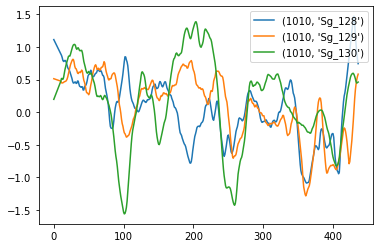

In [62]:
cols = group_sg(1010)
for col in cols:
    plt.plot(df[col])
    
plt.legend(cols)